In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
df=pd.read_csv('data.csv')
df.head(3)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1


<AxesSubplot:xlabel='age_group', ylabel='count'>

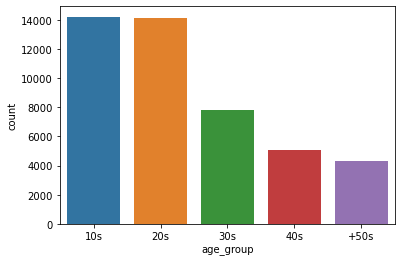

In [250]:
df.age_group=df.age_group.apply(lambda x:'+50s'if x in ['50s','60s','+70s'] else x)
sns.countplot(x='age_group',data=df,order=['10s','20s','30s','40s','+50s'])

In [251]:
#7에 가까울수록 agree strongly, 0이 무응답으로 변환
df['tp01']=7-df['tp01']
df['tp02']=7-df['tp02']
df['tp03']=7-df['tp03']
df['tp04']=7-df['tp04']
df['tp05']=7-df['tp05']
df['tp06']=7-df['tp06']
df['tp07']=7-df['tp07']
df['tp08']=7-df['tp08']
df['tp09']=7-df['tp09']
df['tp10']=7-df['tp10']

In [201]:
#나이와 관계없이 이런 분포로 대답했다? 이것도 해야할까..?
#예를 들어 이 성격특성에 대해서는 무응답한 사람들이 많았다

# 성격특성이 연령대에 따라 다른 분포를 보일까?

## tp01: 외향적인, 열정적인 
- 연령대가 증가할수록 자신이 외향적이고 열정적이라고 생각하는 비율이 미약하게 증가
- 연령대에 따라 크게 달라지지는 않음

In [252]:
#tp01 무응답한 사람들 제거
tp01_df=df[df['tp01']!=0]
(tp01_df['tp01']==0).sum()

0

In [253]:
pivot1=pd.pivot_table(tp01_df,values='index',index='tp01',columns='age_group',aggfunc='count',margins=True)
pivot1=pivot1.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot1

age_group,10s,20s,30s,40s,+50s
tp01,,,,,
1,1896,1901,1095,673,476
2,2478,2539,1392,820,713
3,1861,1935,1045,583,476
4,1155,1136,687,400,314
5,2504,2436,1332,908,697
6,2771,2699,1455,1087,1002
7,1496,1422,797,531,537
All,14161,14068,7803,5002,4215


In [254]:
#비율
pivot2=pivot1/pivot1.loc['All']*100
pivot3=pivot2.transpose()
pivot3

tp01,1,2,3,4,5,6,7,All
age_group,,,,,,,,
10s,13.388885,17.498764,13.141727,8.156204,17.682367,19.567827,10.564226,100.0
20s,13.512937,18.048052,13.754620,8.075064,17.315894,19.185385,10.108047,100.0
30s,14.033064,17.839293,13.392285,8.804306,17.070358,18.646674,10.214020,100.0
40s,13.454618,16.393443,11.655338,7.996801,18.152739,21.731307,10.615754,100.0
+50s,11.293001,16.915777,11.293001,7.449585,16.536180,23.772242,12.740214,100.0


Text(0.5, 1.0, 'extraverted, enthusiastic')

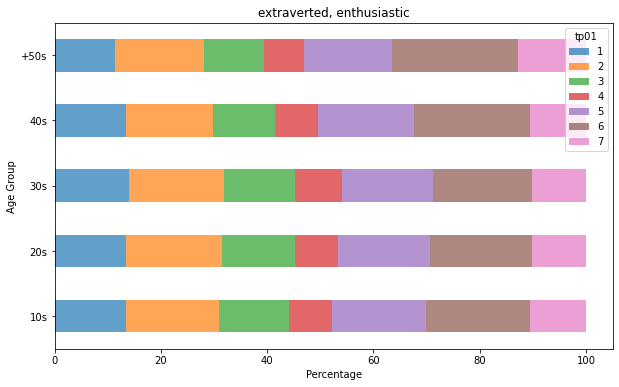

In [255]:
#분포 그래프
pivot3.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('extraverted, enthusiastic')

<AxesSubplot:xlabel='age_group', ylabel='tp01'>

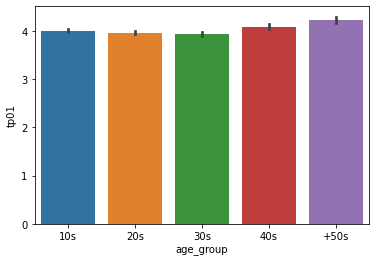

In [256]:
#평균
sns.barplot(data=tp01_df,x='age_group',y='tp01',order=['10s','20s','30s','40s','+50s'])

## tp02: 비판적인 싸우려드는
- 연령대가 증가함에 따라 자신이 비판적이고 싸우기를 좋아하는 성격이 아니라고 답하는 비율이 현저하게 증가
- 연령대별 차이가 뚜렷하게 나타남

In [257]:
#tp02 무응답한 사람들 제거
tp02_df=df[df['tp02']!=0]
pivot4=pd.pivot_table(tp02_df,values='index',index='tp02',columns='age_group',aggfunc='count',margins=True)
pivot4=pivot4.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot4

age_group,10s,20s,30s,40s,+50s
tp02,,,,,
1,814,1154,901,756,989
2,1250,1460,988,849,793
3,1231,1230,794,515,428
4,1472,1170,637,369,273
5,3963,3925,2179,1386,1045
6,3223,3194,1486,798,507
7,2188,1923,821,330,176
All,14141,14056,7806,5003,4211


In [258]:
#비율
pivot5=pivot4/pivot4.loc['All']*100
pivot6=pivot5.transpose()
pivot6

tp02,1,2,3,4,5,6,7,All
age_group,,,,,,,,
10s,5.756311,8.839545,8.705184,10.409448,28.024892,22.791882,15.472739,100.0
20s,8.210017,10.387023,8.750711,8.323847,27.924018,22.723392,13.680990,100.0
30s,11.542403,12.656931,10.171663,8.160389,27.914425,19.036638,10.517551,100.0
40s,15.110933,16.969818,10.293824,7.375575,27.703378,15.950430,6.596042,100.0
+50s,23.486108,18.831631,10.163857,6.483021,24.815958,12.039896,4.179530,100.0


Text(0.5, 1.0, 'critical,quarrelsome')

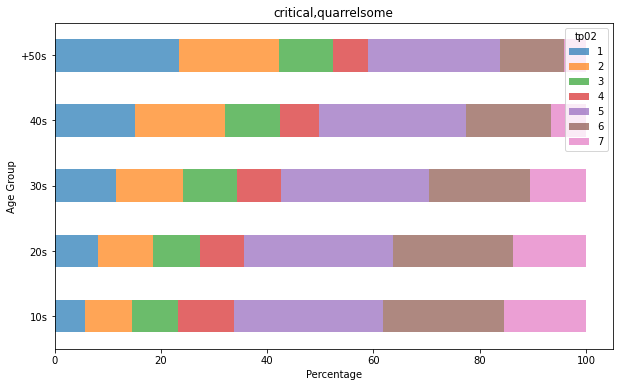

In [259]:
#분포 그래프
pivot6.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('Age Group')
plt.title('critical,quarrelsome')

<AxesSubplot:xlabel='age_group', ylabel='tp02'>

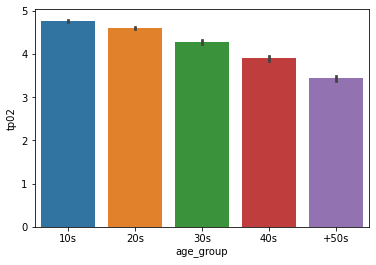

In [260]:
#평균
sns.barplot(data=tp02_df,x='age_group',y='tp02',order=['10s','20s','30s','40s','+50s'])

- 다음과 같이 연령대에 따라 큰 차이를 보이는 성격특성, 아닌 성격특성 존재
- 연령대에 따라 성격특성이 달라진다 == 해당 성격특성은 각각의 사람이 생물학적으로 타고나는 것보다는 환경적으로 변화할 가능성이 크다
- 왜 그럴까? 어떤 요인이 영향을 미치길래 이럴까?
> <strong>우리가 가진 설문조사에서 찾을 수 있는 환경적 요인들이 영향을 미쳐서 그런건지 확인해보자!

# 교육수준이 영향을 미치는가? 
- 교육수준에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)
> 1: 고등학교 미만<br>
> 2: 고등학교 졸업<br>
> 3: 학사 학위<br>
> 4: 석박사 학위

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

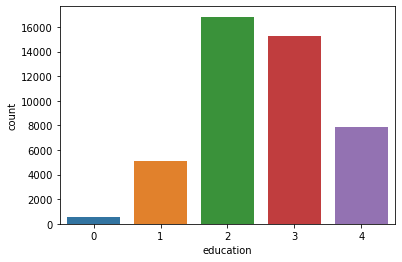

In [261]:
#교육수준 분포 보기
sns.countplot(df['education'])

In [262]:
#일단 교육수준 무응답 제거
education_df=df[df['education']!=0]

## 교육수준이 외향적, 열정적 성격특성에 영향을 미치는가?

In [263]:
tp01_education_df=education_df[education_df['tp01']!=0] # tp01 무응답 제거
pivot7=pd.pivot_table(tp01_education_df,values='index',index='tp01',columns='education',aggfunc='count',margins=True)
pivot7

education,1,2,3,4,All
tp01,,,,,
1,728,2410,1936,888,5962
2,868,3015,2716,1249,7848
3,613,2250,1955,1010,5828
4,451,1389,1169,643,3652
5,864,3006,2635,1289,7794
6,981,3123,3098,1714,8916
7,554,1536,1626,1013,4729
All,5059,16729,15135,7806,44729


In [264]:
#비율
pivot8=pivot7/pivot7.loc['All']*100
pivot9=pivot8.transpose()
pivot9=pivot9.iloc[:4,:]
pivot9

tp01,1,2,3,4,5,6,7,All
education,,,,,,,,
1,14.390196,17.157541,12.117019,8.914805,17.078474,19.391184,10.950781,100.0
2,14.406121,18.022595,13.449698,8.302947,17.968797,18.668181,9.181661,100.0
3,12.791543,17.945160,12.917080,7.723819,17.409977,20.469111,10.743310,100.0
4,11.375865,16.000512,12.938765,8.237253,16.512939,21.957469,12.977197,100.0


Text(0.5, 1.0, 'extraverted,enthusiastic')

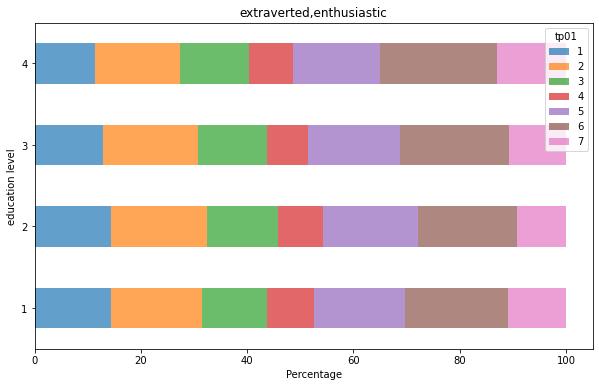

In [265]:
#분포 그래프
pivot9.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('education level')
plt.title('extraverted,enthusiastic')

<AxesSubplot:xlabel='education', ylabel='tp01'>

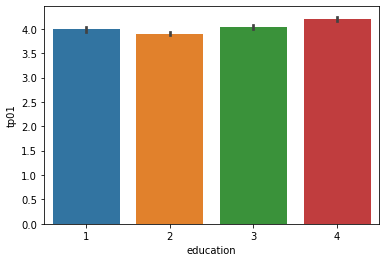

In [266]:
sns.barplot(data=tp01_education_df,x='education',y='tp01')

## 교육수준이 비판적, 싸우려드는 성격특성에 영향을 미치는가?

In [267]:
tp02_education_df=education_df[education_df['tp02']!=0] # tp01 무응답 제거
pivot10=pd.pivot_table(tp02_education_df,values='index',index='tp02',columns='education',aggfunc='count',margins=True)
pivot10

education,1,2,3,4,All
tp02,,,,,
1,312,1393,1726,1128,4559
2,462,1775,1894,1154,5285
3,431,1460,1472,788,4151
4,565,1543,1134,630,3872
5,1414,4774,4145,2004,12337
6,1095,3575,3092,1357,9119
7,777,2189,1669,739,5374
All,5056,16709,15132,7800,44697


In [268]:
#비율
pivot11=pivot10/pivot10.loc['All']*100
pivot12=pivot11.transpose()
pivot12=pivot12.iloc[:4,:]
pivot12

tp02,1,2,3,4,5,6,7,All
education,,,,,,,,
1,6.170886,9.137658,8.524525,11.174842,27.966772,21.657437,15.367880,100.0
2,8.336824,10.623018,8.737806,9.234544,28.571429,21.395655,13.100724,100.0
3,11.406291,12.516521,9.727729,7.494052,27.392281,20.433518,11.029606,100.0
4,14.461538,14.794872,10.102564,8.076923,25.692308,17.397436,9.474359,100.0


Text(0.5, 1.0, 'critical,quarrelsome')

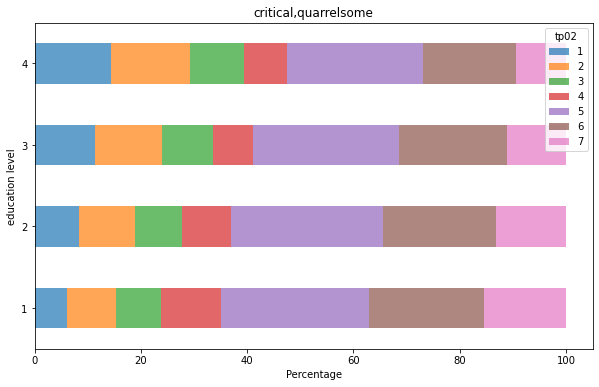

In [269]:
#분포 그래프
pivot12.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('education level')
plt.title('critical,quarrelsome')

<AxesSubplot:xlabel='education', ylabel='tp02'>

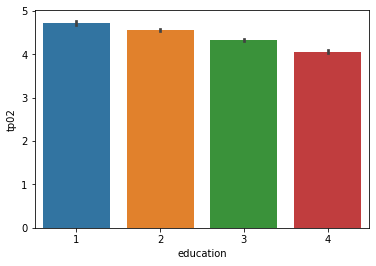

In [270]:
sns.barplot(data=tp02_education_df,x='education',y='tp02')

# 형제자매수가 영향을 미치는가? 
- 형제자매수에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='familysize', ylabel='count'>

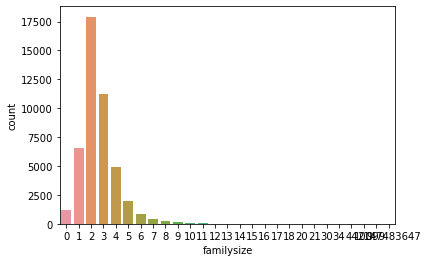

In [271]:
#형제자매수 분포보기
sns.countplot(df['familysize'])

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='familysize', ylabel='count'>

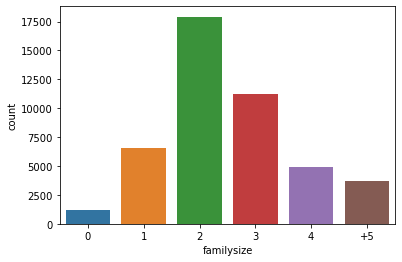

In [272]:
#5명 이상은 통합
df.familysize=df.familysize.apply(lambda x:'+5'if x >=5 else x)
sns.countplot(df['familysize'],order=[0,1,2,3,4,'+5'])

## 형제자매수가 외향적, 열정적 성격특성에 영향을 미치는가?

In [273]:
tp01_df=df[df['tp01']!=0] # tp01 무응답 제거
pivot13=pd.pivot_table(data=tp01_df,values='index',index='tp01',columns='familysize',aggfunc='count',margins=True)
pivot13

familysize,0,1,2,3,4,+5,All
tp01,,,,,,,
1,165,886,2396,1439,656,499,6041
2,200,1173,3198,1928,842,601,7942
3,146,834,2406,1456,623,435,5900
4,110,540,1441,917,370,314,3692
5,212,1107,3045,1991,829,693,7877
6,235,1280,3509,2232,1031,727,9014
7,137,677,1835,1223,523,388,4783
All,1205,6497,17830,11186,4874,3657,45249


In [274]:
#비율
pivot14=pivot13/pivot13.loc['All']*100
pivot15=pivot14.transpose()
pivot15=pivot15.iloc[:6,:]
pivot15

tp01,1,2,3,4,5,6,7,All
familysize,,,,,,,,
0,13.692946,16.597510,12.116183,9.128631,17.593361,19.502075,11.369295,100.0
1,13.637063,18.054487,12.836694,8.311528,17.038633,19.701401,10.420194,100.0
2,13.438026,17.936063,13.494111,8.081884,17.077958,19.680314,10.291643,100.0
3,12.864295,17.235831,13.016270,8.197747,17.799035,19.953513,10.933309,100.0
4,13.459171,17.275339,12.782109,7.591301,17.008617,21.153057,10.730406,100.0
+5,13.645064,16.434236,11.894996,8.586273,18.949959,19.879683,10.609789,100.0


Text(0.5, 1.0, 'extroverted,enthusiastic')

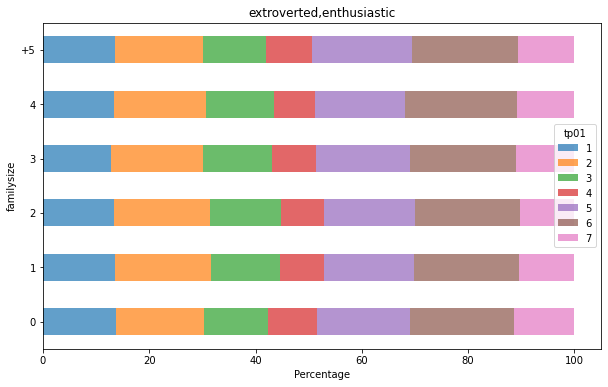

In [275]:
#분포 그래프
pivot15.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('familysize')
plt.title('extroverted,enthusiastic')

<AxesSubplot:xlabel='familysize', ylabel='tp01'>

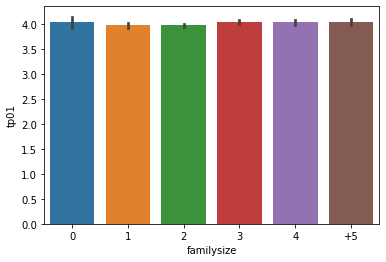

In [276]:
#평균비교
sns.barplot(data=tp01_df,x='familysize',y='tp01',order=[0,1,2,3,4,'+5'])

#이거 내가 5명이상부터 묶었는데 이거 묶는거에 대한 명확한 기준 필요하다면
#boxplot 그려서 이상치 파악해보자!

## 형제자매수가 비판적, 싸우려드는 성격특성에 영향을 미치는가?


In [277]:
tp02_df=df[df['tp02']!=0] # tp02 무응답 제거
pivot16=pd.pivot_table(tp02_df,values='index',index='tp02',columns='familysize',aggfunc='count',margins=True)
pivot16

familysize,0,1,2,3,4,+5,All
tp02,,,,,,,
1,94,635,1631,1142,600,512,4614
2,124,710,2039,1334,622,511,5340
3,105,538,1664,1084,467,340,4198
4,124,538,1570,935,405,349,3921
5,315,1749,4949,3153,1348,984,12498
6,272,1431,3768,2231,899,607,9208
7,171,889,2211,1295,525,347,5438
All,1205,6490,17832,11174,4866,3650,45217


In [278]:
#비율
pivot17=pivot16/pivot16.loc['All']*100
pivot18=pivot17.transpose()
pivot18=pivot18.iloc[:6,:]
pivot18

tp02,1,2,3,4,5,6,7,All
familysize,,,,,,,,
0,7.800830,10.290456,8.713693,10.290456,26.141079,22.572614,14.190871,100.0
1,9.784284,10.939908,8.289676,8.289676,26.949153,22.049307,13.697997,100.0
2,9.146478,11.434500,9.331539,8.804397,27.753477,21.130552,12.399058,100.0
3,10.220154,11.938428,9.701092,8.367639,28.217290,19.965992,11.589404,100.0
4,12.330456,12.782573,9.597205,8.323058,27.702425,18.475134,10.789149,100.0
+5,14.027397,14.000000,9.315068,9.561644,26.958904,16.630137,9.506849,100.0


Text(0.5, 1.0, 'critical,quarrelsome')

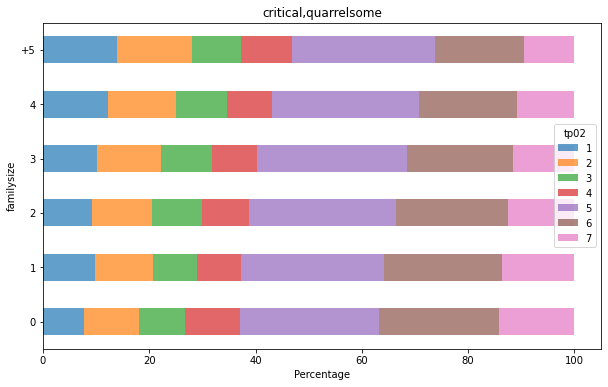

In [279]:
#분포 그래프
pivot18.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('familysize')
plt.title('critical,quarrelsome')

<AxesSubplot:xlabel='familysize', ylabel='tp02'>

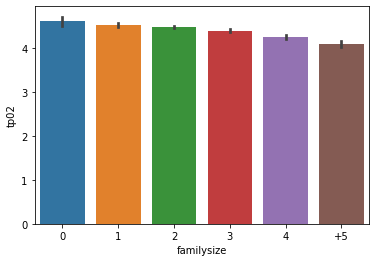

In [280]:
#평균
sns.barplot(data=tp02_df,x='familysize',y='tp02',order=[0,1,2,3,4,'+5'])

# 혼인상태가 영향을 미치는가? 
- 혼인상태에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)
> 1: 미혼<br>
> 2: 기혼(현재 결혼상태)<br>
> 3: 이혼(이전에 결혼)<br>

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='married', ylabel='count'>

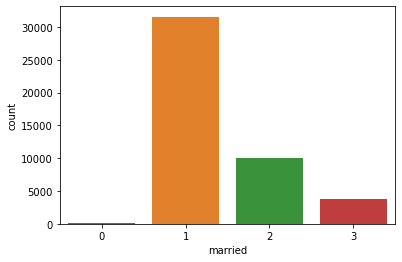

In [281]:
sns.countplot(df['married'])

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x2738a0ca0a0>,
 [Text(0, 0, 'never'), Text(1, 0, 'currently'), Text(2, 0, 'previously')])

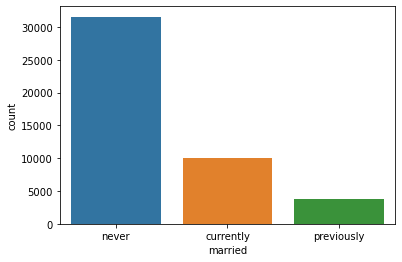

In [282]:
married_df=df[df['married']!=0]
a=sns.countplot(married_df['married'])
plt.xticks([0,1,2],['never','currently','previously'])

## 혼인상태가 외향적, 열정적 성격특성에 영향을 미치는가?

In [283]:
tp01_married_df=married_df[married_df['tp01']!=0] # tp01 무응답 제거
pivot19=pd.pivot_table(tp01_married_df,values='index',index='tp01',columns='married',aggfunc='count',margins=True)
pivot19

married,1,2,3,All
tp01,,,,
1,4361,1193,474,6028
2,5674,1635,623,7932
3,4223,1233,431,5887
4,2617,790,281,3688
5,5440,1729,693,7862
6,5985,2209,801,8995
7,3132,1172,461,4765
All,31432,9961,3764,45157


In [284]:
#비율
pivot20=pivot19/pivot19.loc['All']*100
pivot21=pivot20.transpose()
pivot21=pivot21.iloc[:3,:]
pivot21

tp01,1,2,3,4,5,6,7,All
married,,,,,,,,
1,13.874396,18.051667,13.435353,8.325910,17.307203,19.041105,9.964368,100.0
2,11.976709,16.414015,12.378275,7.930931,17.357695,22.176488,11.765887,100.0
3,12.592986,16.551541,11.450584,7.465462,18.411265,21.280553,12.247609,100.0


Text(0.5, 1.0, 'extraverted,enthusiastic')

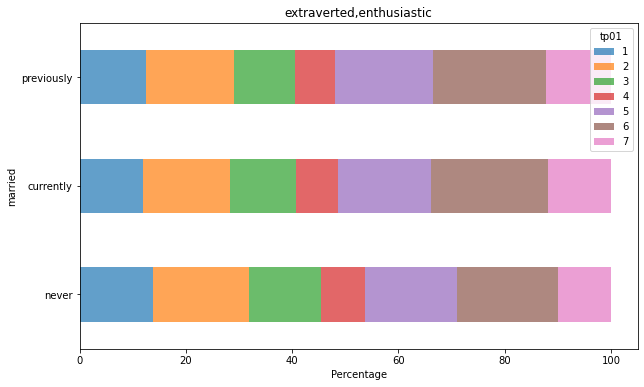

In [285]:
#분포 그래프
pivot21.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('married')
plt.yticks([0,1,2],['never','currently','previously'])
plt.title('extraverted,enthusiastic')

([<matplotlib.axis.XTick at 0x2738a38f760>,
 [Text(0, 0, 'never'), Text(1, 0, 'currently'), Text(2, 0, 'previously')])

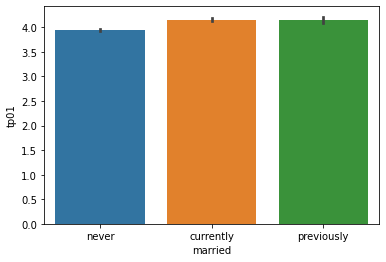

In [286]:
#평균
b=sns.barplot(data=tp01_married_df,x='married',y='tp01',order=[1,2,3])
plt.xticks([0,1,2],['never','currently','previously'])

## 혼인상태가 비판적, 싸우려드는 성격특성에 영향을 미치는가?


In [287]:
tp02_married_df=married_df[married_df['tp02']!=0] # tp02 무응답 제거
pivot22=pd.pivot_table(tp02_married_df,values='index',index='tp02',columns='married',aggfunc='count',margins=True)
pivot22

married,1,2,3,All
tp02,,,,
1,2395,1499,713,4607
2,3127,1496,707,5330
3,2775,1062,357,4194
4,2892,755,265,3912
5,8814,2686,968,12468
6,6988,1677,520,9185
7,4416,783,231,5430
All,31407,9958,3761,45126


In [288]:
#비율
pivot23=pivot22/pivot22.loc['All']*100
pivot24=pivot23.transpose()
pivot24=pivot24.iloc[:3,:]
pivot24

tp02,1,2,3,4,5,6,7,All
married,,,,,,,,
1,7.625689,9.956379,8.835610,9.208138,28.063807,22.249817,14.060560,100.0
2,15.053224,15.023097,10.664792,7.581844,26.973288,16.840731,7.863025,100.0
3,18.957724,18.798192,9.492156,7.045998,25.737836,13.826110,6.141984,100.0


Text(0.5, 1.0, 'critical,quarrelsome')

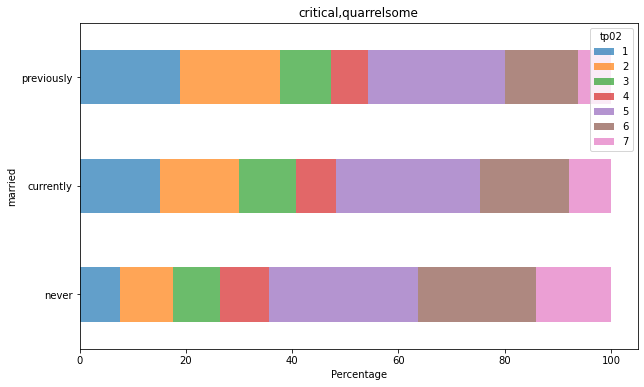

In [289]:
#분포 그래프
pivot24.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('married')
plt.yticks([0,1,2],['never','currently','previously'])
plt.title('critical,quarrelsome')

([<matplotlib.axis.XTick at 0x2738b91b460>,
 [Text(0, 0, 'never'), Text(1, 0, 'currently'), Text(2, 0, 'previously')])

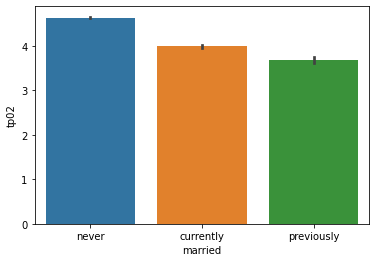

In [290]:
#평균
c=sns.barplot(data=tp02_married_df,x='married',y='tp02',order=[1,2,3])
plt.xticks([0,1,2],['never','currently','previously'])

# 유년기 거주지역이 영향을 미치는가?
- 유년기 거주지역에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)
> 1: rural<br>
> 2: suburban<br>
> 3: urban<br>

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='urban', ylabel='count'>

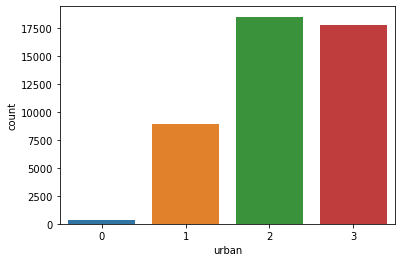

In [291]:
sns.countplot(df['urban'])

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x2738ccaf730>,
 [Text(0, 0, 'rural'), Text(1, 0, 'suburban'), Text(2, 0, 'urban')])

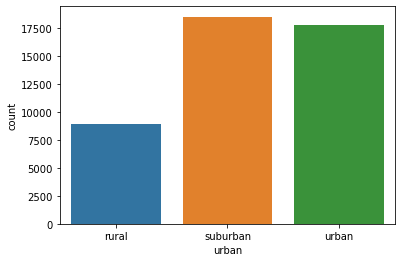

In [293]:
urban_df=df[df['urban']!=0]
a=sns.countplot(urban_df['urban'])
plt.xticks([0,1,2],['rural','suburban','urban'])

## 유년기 거주지역이 외향적, 열정적 성격특성에 영향을 미치는가

In [294]:
tp01_urban_df=urban_df[urban_df['tp01']!=0] # tp01 무응답 제거
pivot25=pd.pivot_table(tp01_urban_df,values='index',index='tp01',columns='urban',aggfunc='count',margins=True)
pivot25

urban,1,2,3,All
tp01,,,,
1,1292,2468,2247,6007
2,1575,3483,2835,7893
3,1192,2466,2202,5860
4,754,1442,1464,3660
5,1554,3124,3140,7818
6,1583,3589,3787,8959
7,891,1878,1965,4734
All,8841,18450,17640,44931


In [295]:
#비율
pivot26=pivot20/pivot20.loc['All']*100
pivot27=pivot26.transpose()
pivot27=pivot27.iloc[:3,:]
pivot27

tp01,1,2,3,4,5,6,7,All
married,,,,,,,,
1,13.874396,18.051667,13.435353,8.325910,17.307203,19.041105,9.964368,100.0
2,11.976709,16.414015,12.378275,7.930931,17.357695,22.176488,11.765887,100.0
3,12.592986,16.551541,11.450584,7.465462,18.411265,21.280553,12.247609,100.0


Text(0.5, 1.0, 'extraverted,enthusiastic')

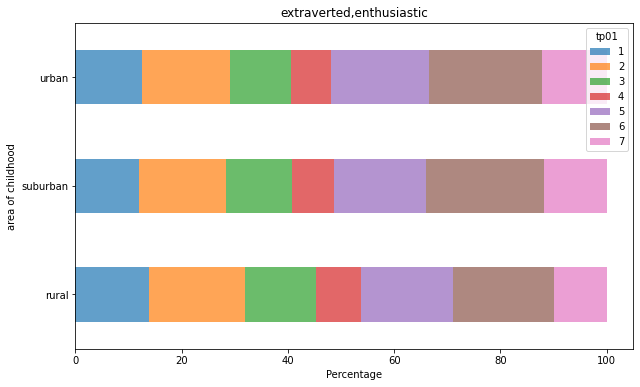

In [296]:
#분포 그래프
pivot27.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('area of childhood')
plt.yticks([0,1,2],['rural','suburban','urban'])
plt.title('extraverted,enthusiastic')

([<matplotlib.axis.XTick at 0x2738cdaa5e0>,
 [Text(0, 0, 'rural'), Text(1, 0, 'suburban'), Text(2, 0, 'urban')])

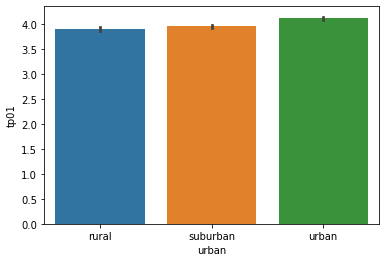

In [297]:
#평균
b=sns.barplot(data=tp01_urban_df,x='urban',y='tp01',order=[1,2,3])
plt.xticks([0,1,2],['rural','suburban','urban'])

## 유년기 거주지역이 비판적, 싸우려드는 성격특성에 영향을 미치는가?

In [298]:
tp02_urban_df=urban_df[urban_df['tp02']!=0] # tp02 무응답 제거
pivot28=pd.pivot_table(tp02_urban_df,values='index',index='tp02',columns='urban',aggfunc='count',margins=True) #개수세기
#비율
pivot29=pivot28/pivot28.loc['All']*100
pivot30=pivot29.transpose()
pivot30=pivot30.iloc[:3,:]
pivot30

tp02,1,2,3,4,5,6,7,All
urban,,,,,,,,
1,10.917327,12.627407,9.229898,8.788222,27.587769,19.762174,11.087203,100.0
2,10.073737,11.776187,10.165908,8.246584,28.518759,19.903492,11.315333,100.0
3,9.963121,11.392908,8.414184,9.026950,26.723404,21.214184,13.265248,100.0


Text(0.5, 1.0, 'critical,quarrelsome')

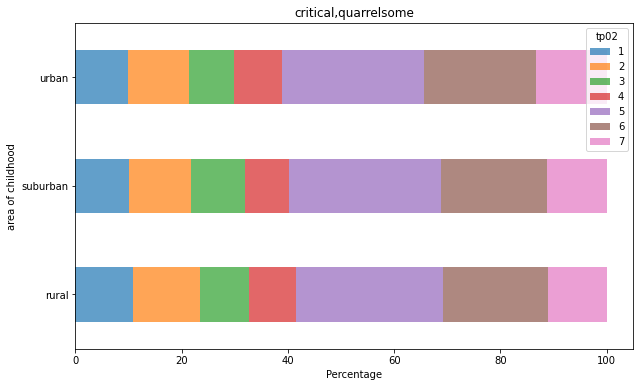

In [299]:
#분포 그래프
pivot30.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('area of childhood')
plt.yticks([0,1,2],['rural','suburban','urban'])
plt.title('critical,quarrelsome')

([<matplotlib.axis.XTick at 0x2738e0c35b0>,
 [Text(0, 0, 'rural'), Text(1, 0, 'suburban'), Text(2, 0, 'urban')])

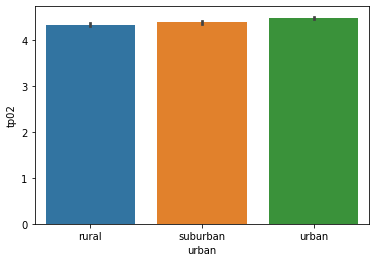

In [300]:
#평균
b=sns.barplot(data=tp02_urban_df,x='urban',y='tp02',order=[1,2,3])
plt.xticks([0,1,2],['rural','suburban','urban'])

# 모국어(가 영어인지)에 따라 영향? 
> 1. yes
> 2. no

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engnat', ylabel='count'>

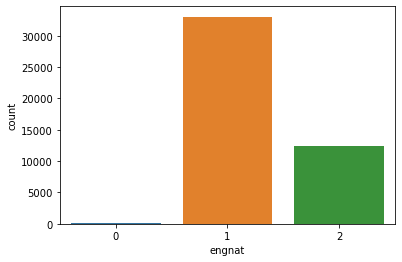

In [301]:
sns.countplot(df['engnat'])

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x2739192d670>,
 [Text(0, 0, 'yes'), Text(1, 0, 'no')])

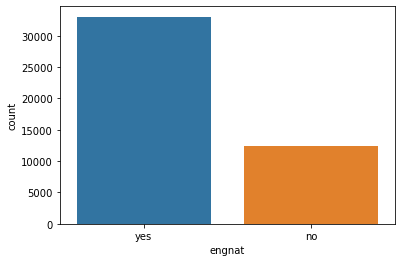

In [303]:
engnat_df=df[df['engnat']!=0]
a=sns.countplot(engnat_df['engnat'])
plt.xticks([0,1],['yes','no'])

## 모국어가 외향적, 열정적 성격에 영향?

In [306]:
tp01_engnat_df=engnat_df[engnat_df['tp01']!=0] # tp02 무응답 제거
pivot31=pd.pivot_table(tp01_engnat_df,values='index',index='tp01',columns='engnat',aggfunc='count',margins=True) #개수세기
#비율
pivot32=pivot31/pivot31.loc['All']*100
pivot33=pivot32.transpose()
pivot33=pivot33.iloc[:2,:]
pivot33

tp01,1,2,3,4,5,6,7,All
engnat,,,,,,,,
1,13.737971,17.739676,13.195883,7.701913,17.45645,19.664393,10.503715,100.0
2,12.288239,17.094918,12.604361,9.370187,17.29756,20.629002,10.715733,100.0


Text(0.5, 1.0, 'extraverted,enthusiastic')

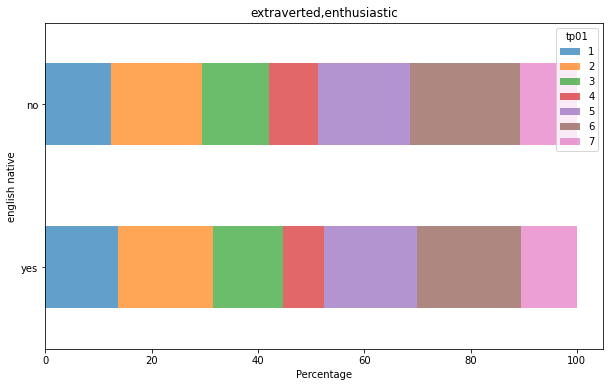

In [307]:
#분포 그래프
pivot33.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('english native')
plt.yticks([0,1],['yes','no'])
plt.title('extraverted,enthusiastic')

([<matplotlib.axis.XTick at 0x27391edd880>,
 [Text(0, 0, 'yes'), Text(1, 0, 'no')])

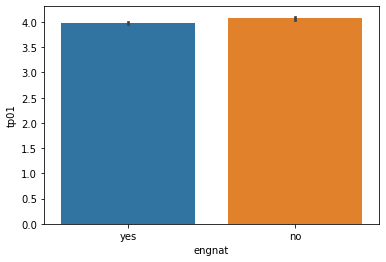

In [308]:
#평균
b=sns.barplot(data=tp01_engnat_df,x='engnat',y='tp01',order=[1,2])
plt.xticks([0,1],['yes','no'])

## 모국어가 비판적, 싸우려드는 성격에 영향?

In [309]:
tp02_engnat_df=engnat_df[engnat_df['tp02']!=0] # tp02 무응답 제거
pivot34=pd.pivot_table(tp02_engnat_df,values='index',index='tp02',columns='engnat',aggfunc='count',margins=True) #개수세기
#비율
pivot35=pivot34/pivot34.loc['All']*100
pivot36=pivot35.transpose()
pivot36=pivot36.iloc[:2,:]
pivot36

tp02,1,2,3,4,5,6,7,All
engnat,,,,,,,,
1,10.697958,12.429137,9.777507,8.680280,28.680280,18.863151,10.871685,100.0
2,8.911774,10.152449,7.954914,8.644178,24.870256,24.391826,15.074603,100.0


Text(0.5, 1.0, 'critical,quarrelsome')

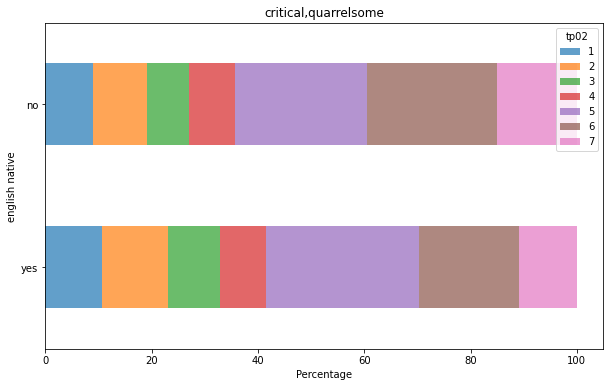

In [310]:
#분포 그래프
pivot36.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7)
plt.xlabel('Percentage')
plt.ylabel('english native')
plt.yticks([0,1],['yes','no'])
plt.title('critical,quarrelsome')

([<matplotlib.axis.XTick at 0x27391fce370>,
 [Text(0, 0, 'yes'), Text(1, 0, 'no')])

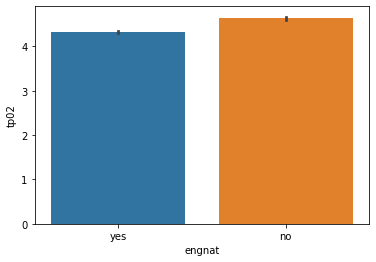

In [311]:
#평균
b=sns.barplot(data=tp02_engnat_df,x='engnat',y='tp02',order=[1,2])
plt.xticks([0,1],['yes','no'])

# 종교

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Hindu'),
  Text(2, 0, 'Agnostic'),
  Text(3, 0, 'Atheist'),
  Text(4, 0, 'Christian_Other'),
  Text(5, 0, 'Christian_Catholic'),
  Text(6, 0, 'Muslim'),
  Text(7, 0, 'Buddhist'),
  Text(8, 0, 'Christian_Protestant'),
  Text(9, 0, 'Jewish'),
  Text(10, 0, 'Christian_Mormon'),
  Text(11, 0, 'Sikh')])

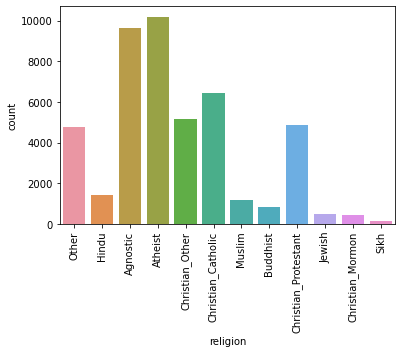

In [316]:
sns.countplot(df['religion'],orient=90)
plt.xticks(rotation=90)

# 성별

# hand

# 인종

In [ ]:
#요인분석(성격특성에 어떤 요인이 영향을 많이 끼치는가?), ANOVA